In [15]:
# -*- coding: utf-8 -*-
from scipy import ndimage
from scipy import misc
import numpy
from matplotlib import pyplot
from scipy.misc import toimage
import scipy.misc


ImportError: cannot import name 'toimage' from 'scipy.misc' (C:\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [4]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import keras.layers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 96s 1us/step


In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# normalize inputs from 0-255 to 0.0-1.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

TypeError: Cannot handle this data type: (1, 1, 3), <f4

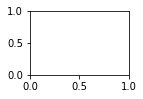

In [10]:
for i in range(0, 9):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [14]:
pip install scipy==1.2.0

  Running setup.py clean for scipy
Failed to build scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
    Running setup.py install for scipy: started
    Running setup.py install for scipy: finished with status 'error'
  Rolling back uninstall of scipy
  Moving to c:\anaconda3\lib\site-packages\scipy-1.5.0.dist-info\
   from C:\Anaconda3\Lib\site-packages\~cipy-1.5.0.dist-info
  Moving to c:\anaconda3\lib\site-packages\scipy\
   from C:\Anaconda3\Lib\site-packages\~cipy
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tcttn\\AppData\\Local\\Temp\\pip-install-v8hgtfaf\\scipy\\setup.py'"'"'; __file__='"'"'C:\\Users\\tcttn\\AppData\\Local\\Temp\\pip-install-v8hgtfaf\\scipy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\tcttn\AppData\Local\Temp\pip-wheel-isz70278'
       cwd: C:\Users\tcttn\AppData\Local\Temp\pip-install-v8hgtfaf\scipy\
  Complete output (133 lines):
  Running from scipy source directory.
  lapack_opt_info:
  lapack_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  openblas_lapack_info:
    libraries openblas not found

In [ ]:
kedi = ndimage.imread("kedi.jpg")
kedi = scipy.misc.imresize(kedi,(32,32))
kedi = numpy.array(kedi)
print("jfjef")
kedi = kedi.reshape(1,3,32,32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 300
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print("---------------")

print(model.predict_classes(kedi))